In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [21]:
df = pd.read_csv(r"G:\My Drive\4b - Courses\9 - Data Science\Datasets\ALL CSV FILES - 2nd Edition\insurance_claim.csv")
df.head()

,age,insuranceclaim
0,18.437371,0
1,19.539508,0
2,19.921685,0
3,20.625442,0
4,21.139852,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             100 non-null    float64
 1   insuranceclaim  100 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [23]:
df.describe()

,age,insuranceclaim
count,100.000000,100.00
mean,46.279690,0.55
std,18.066037,0.50
min,18.437371,0.00
25%,29.792119,0.00
50%,44.009223,1.00
75%,64.373831,1.00
max,74.034135,1.00


In [24]:
x = df[["age"]].values
y = df["insuranceclaim"].values

In [29]:
lregr = LogisticRegression()
lregr.fit(x,y)
print(lregr.score(x,y))
y_pred = lregr.predict(x)
y_pred_prob = lregr.predict_proba(x)

dg = pd.DataFrame(np.vstack((lregr.intercept_,lregr.coef_.T)), index=df.columns[:-1].insert(0,'Intercept'), columns=['Beta'])
dg

0.98


,Beta
Intercept,-47.810558
age,1.222093


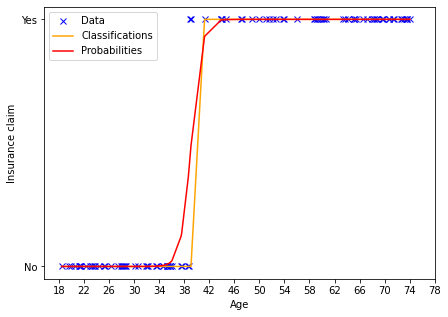

In [48]:
plt.figure(figsize=(7,5))
plt.plot(x,y,'x',color= 'blue', label="Data")
plt.plot(x,y_pred, color='orange', label='Classifications')
plt.plot(x,y_pred_prob[:,1], color='red', label= 'Probabilities')

plt.xticks(np.arange(18, 80, 4.0))
plt.xlabel("Age")
plt.ylabel("Insurance claim")
plt.yticks((0,1), labels=('No', 'Yes'))
plt.legend()
plt.show()